**Problem Statement :**
In this project, the goal is to develop a predictive model that can forecast future energy consumption values for a power grid based on historical consumption patterns. The dataset contains time series data of energy consumption recorded at regular intervals

**Dataset Name: Household Power Consumption Data**

Dataset Overview: This dataset contains detailed measurements of electric power consumption in a single household over a period of time. The dataset captures electrical energy usage, including active and reactive power, voltage, current intensity, and energy sub-metering. It is structured in a time series format, where each record represents one minute of power consumption data.

Features:

**Date**: The date when the data was recorded, in the format dd/mm/yyyy.

**Time**: The time when the data was recorded, in the format hh:mm:ss.

**Global Active Power** (kilowatts): The total active power consumed by the household, measured in kilowatts (kW). This is the primary measure of power consumption and represents the rate at which the household consumes electricity.

**Global Reactive Power** (kilowatts): The reactive power consumed by the household, measured in kilowatts (kW). Reactive power is the power that flows back and forth between the source and the load, and it is important for maintaining voltage levels in the system.

**Voltage (volts)**: The household voltage measured during each recording. It indicates the potential difference in the electrical system and is crucial for ensuring safe and efficient power distribution.

**Global Intensity** (amps): The intensity of the electrical current flowing through the household, measured in amperes (A). It reflects the overall current drawn by the household appliances.

**Sub-Metering 1** (watt-hour): Energy consumption in watt-hours measured by sub-metering channel 1. This sub-metering corresponds to specific electrical circuits within the household, such as the kitchen or laundry appliances.

**Sub-Metering 2** (watt-hour): Energy consumption in watt-hours measured by sub-metering channel 2. This channel captures the power usage of additional household circuits, typically the heating and cooling systems.

**Sub-Metering 3** (watt-hour): Energy consumption in watt-hours measured by sub-metering channel 3, typically representing power consumption from the rest of the household circuits, such as lighting or general power outlets.




#Milestone 1

**Step 1:** Loading the Dataset

This step downloads the dataset from Google Drive and loads it into a pandas DataFrame.

# **Import libraries and Load the dataset**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!gdown --fuzzy https://drive.google.com/file/d/1bvaXJJqNObOCkX-i475BNxpidk024pyx/view?usp=sharing

Downloading...
From (original): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx
From (redirected): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx&confirm=t&uuid=bf7d886c-e46e-4ccc-a813-716a175ea541
To: /content/household_power_consumption.txt
100% 133M/133M [00:01<00:00, 80.9MB/s]


In [4]:
df=pd.read_csv('/content/household_power_consumption.txt',sep=";")

<ipython-input-4-e38478b95906>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/household_power_consumption.txt',sep=";")


# **Basic Data Exploration**

In [5]:
df.shape

(2075259, 9)

**observation**:The dataset consists of 2075259 rows with 9 columns

In [6]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


**observation**:The above are the first five rows of the dataset

In [7]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


**observation**:The above are the last five rows of the dataset


**Observations**:


**Data Types Issue**: Eight columns are object types instead of numeric, indicating non-numeric values or formatting issues.

M**emory Usage**: The dataset uses 142.5 MB, suggesting a large dataset requiring efficient handling.

**Data Cleaning Needed**: Conversion to numeric types is necessary for meaningful analysis and modeling.

In [8]:
len(df)

2075259

**observation**:The length of the DataFrame df is 2,075,259 entries.

In [9]:
df.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


**Observations** :

The dataset contains ~2,049,280 entries, with many missing values. The mean energy consumption is 6.46 watt-hours, with a high standard deviation of 8.44, indicating significant variability. Consumption values range from 0 to 31 watt-hours, with 25% of entries at 0, a median of 1 watt-hour, and 75% at or below 17 watt-hours. The distribution is right-skewed, showing frequent low or zero consumption periods alongside occasional higher usage. These characteristics suggest a need to address missing data, analyze variability, and handle imbalance for accurate insights or predictive modeling.

# **Datatype conversion**

In [10]:
# Convert all columns to float, coercing errors
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Display DataFrame information after conversion
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   float64
 1   Time                   float64
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(9)
memory usage: 142.5 MB


**Observations**

The dataset, with 2,049,280 entries and 156.3 MB memory usage, underwent successful data type conversion to `float64`. Non-numeric values were converted to `NaN`. It includes 9 columns: `Date`, `Time`, `Global_active_power`, `Global_reactive_power`, `Voltage`, `Global_intensity`, `Sub_metering_1`, `Sub_metering_2`, and `Sub_metering_3`. Potential `NaN` values, especially in `Date` and `Time`, need attention. This large-scale dataset requires cleaning and preprocessing, focusing on addressing missing values and ensuring correct datetime parsing. These steps are critical for accurate analysis and optimizing future predictive modeling efforts on energy consumption patterns.

In [11]:
# Display descriptive statistics of a DataFrame after convertion of columns to float
df.describe()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,0.0,0.0,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,NaN,NaN,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,NaN,NaN,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,NaN,NaN,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,NaN,NaN,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,NaN,NaN,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,NaN,NaN,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


 **Observations**

### Observations Summary

1. **Count**: Numeric columns have 2,049,280 entries, but `Date` and `Time` are entirely `NaN`.  
2. **Mean Values**:
   - `Global_active_power`: 1.09, `Global_reactive_power`: 0.12, `Voltage`: 240.84.  
   - `Global_intensity`: 4.63, `Sub_metering_1`: 1.12, `Sub_metering_2`: 1.30, `Sub_metering_3`: 6.46.  
3. **Variability**: High standard deviation in `Global_active_power` and `Global_intensity` suggests fluctuations.  
4. **Range**: Key values span:
   - `Global_active_power`: 0.076–11.12, `Voltage`: 223.2–254.15, `Sub_metering_3`: max 31.  

**Conclusion**: Address missing `Date` and `Time`, then analyze numeric columns further.

# **Finding Null Values and Unique Values**

In [12]:
# Count of unique values in each column
unique_values = df.nunique()
print(unique_values)

Date                        0
Time                        0
Global_active_power      4186
Global_reactive_power     532
Voltage                  2837
Global_intensity          221
Sub_metering_1             88
Sub_metering_2             81
Sub_metering_3             32
dtype: int64


In [13]:
#checks for any null (missing) values in each column
df.isnull().any()

,0
Date,True
Time,True
Global_active_power,True
Global_reactive_power,True
Voltage,True
Global_intensity,True
Sub_metering_1,True
Sub_metering_2,True
Sub_metering_3,True


In [14]:
# Count of null values in each column
null_values = df.isnull().sum()
print(null_values)


Date                     2075259
Time                     2075259
Global_active_power        25979
Global_reactive_power      25979
Voltage                    25979
Global_intensity           25979
Sub_metering_1             25979
Sub_metering_2             25979
Sub_metering_3             25979
dtype: int64


In [15]:
# Percentage of null values in each column
null_percentage = (df.isnull().sum() / len(df)) * 100
print(null_percentage)


Date                     100.000000
Time                     100.000000
Global_active_power        1.251844
Global_reactive_power      1.251844
Voltage                    1.251844
Global_intensity           1.251844
Sub_metering_1             1.251844
Sub_metering_2             1.251844
Sub_metering_3             1.251844
dtype: float64


# **Handling Null Values**

In [16]:
# Drop rows where Sub_metering_3 is null
df = df.dropna(subset=['Sub_metering_3'])
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,NaN,NaN,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,NaN,NaN,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,NaN,NaN,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,NaN,NaN,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,NaN,NaN,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,NaN,NaN,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,NaN,NaN,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,NaN,NaN,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,NaN,NaN,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [17]:
# Fill missing values in Sub_metering_3 with the median and assign it back
df['Sub_metering_3'] = df['Sub_metering_3'].fillna(df['Sub_metering_3'].median())

# Display the updated DataFrame (for the first few rows)
print("Updated DataFrame:")
print(df.head())

Updated DataFrame:
   Date  Time  Global_active_power  Global_reactive_power  Voltage  \
0   NaN   NaN                4.216                  0.418   234.84   
1   NaN   NaN                5.360                  0.436   233.63   
2   NaN   NaN                5.374                  0.498   233.29   
3   NaN   NaN                5.388                  0.502   233.74   
4   NaN   NaN                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  


<ipython-input-17-ebbfb8524bc1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sub_metering_3'] = df['Sub_metering_3'].fillna(df['Sub_metering_3'].median())


In [18]:
# Count of null values in each column after filling
null_values = df.isnull().sum()
print("\nNull Values Count After Filling:")
print(null_values)


Null Values Count After Filling:
Date                     2049280
Time                     2049280
Global_active_power            0
Global_reactive_power          0
Voltage                        0
Global_intensity               0
Sub_metering_1                 0
Sub_metering_2                 0
Sub_metering_3                 0
dtype: int64


# ** Framed Questions**
1.Is there any relation in the pattern of data between global active and reactive power?

2.How has 'Global_active_power' changed or trended over time?

3.What kind of relationship exists between 'Global_active_power' and 'Voltage'?

4.In what way does 'Global_intensity' fluctuate throughout different hours of the day?

5.What is the average daily value of 'Sub_metering'?

6.How does 'Global_reactive_power' differ on holidays compared to regular days?

# **Data** **Conversion**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!gdown --fuzzy https://drive.google.com/file/d/1bvaXJJqNObOCkX-i475BNxpidk024pyx/view?usp=sharing
df=pd.read_csv('/content/household_power_consumption.txt',sep=";")

Downloading...
From (original): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx
From (redirected): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx&confirm=t&uuid=2f513e83-ac3f-4e04-9121-2beeb5cea8cc
To: /content/household_power_consumption.txt
100% 133M/133M [00:01<00:00, 94.3MB/s]


<ipython-input-19-b380e3ed9d01>:5: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/household_power_consumption.txt',sep=";")


In [20]:
# Convert numeric columns to appropriate data types
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')

### **Observation**
The code ensures that the following columns in the dataset are correctly converted to numeric types, enabling proper analysis and visualization:

Global Active Power

Global Reactive Power

Voltage

Global Intensity

Sub Metering 1 and 2

It handles non-numeric values by converting them to NaN using errors='coerce', ensuring the data is ready for calculations or visualizations.








In [21]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [22]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute # if you want as minutes are not mentioned
df.head()

<ipython-input-22-3a4ebfba6603>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Year,Month,Day,Hour,Minute
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,16,17,24
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,16,17,25
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,16,17,26
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,16,17,27
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,16,17,28


### **observations:**
The code extracts time-related features from the `Date` and `Time` columns:  

1. **Year**: Captures the year of each observation.  
2. **Month**: Indicates the month of the observation.  
3. **Day**: Extracts the day of the month.  
4. **Hour**: Represents the specific hour of the observation.  

These features support time-based analysis, enabling aggregation by year, month, day, or hour. Such granularity helps identify patterns, trends, or seasonal variations in energy consumption, enhancing insights for predictive modeling and decision-making. Proper handling of missing values in `Date` and `Time` is essential before extraction.







In [23]:
type(df['DateTime'])

pandas.core.series.Series

In [24]:
df.describe(include='object')

,Date,Time
count,2075259,2075259
unique,1442,1440
top,6/12/2008,17:24:00
freq,1440,1442


In [25]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Year,Month,Day,Hour,Minute
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2075259,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,2008-12-06 07:12:59.999994112,2.008437e+03,6.450359e+00,1.577363e+01,1.150076e+01,2.950017e+01
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,2006-12-16 17:24:00,2.006000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2007-12-12 00:18:30,2.007000e+03,3.000000e+00,8.000000e+00,6.000000e+00,1.500000e+01
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2008-12-06 07:13:00,2.008000e+03,6.000000e+00,1.600000e+01,1.200000e+01,3.000000e+01
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,2009-12-01 14:07:30,2.009000e+03,9.000000e+00,2.300000e+01,1.800000e+01,4.500000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,2010-11-26 21:02:00,2.010000e+03,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,NaN,1.128677e+00,3.415762e+00,8.787773e+00,6.922227e+00,1.731810e+01


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   object        
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   DateTime               datetime64[ns]
 10  Year                   int32         
 11  Month                  int32         
 12  Day                    int32         
 13  Hour                   int32         
 14  Minute                 int32         
dtypes: datetime64[ns](1), float64(7), int32(5), object(2)
memory usage: 197.9+ MB


## **Data Encoding**

In [27]:
# Start of  data encoding
import datetime as dt

def is_holiday(date):
    year = int(date.split('/')[2])
    month = int(date.split('/')[1])
    day = int(date.split('/')[0])

    if dt.datetime(year, month, day).weekday() >= 5:
        return 1.0
    else:
        return 0.0

for data in [df]:
    data['Is_holiday'] = data['Date'].apply(lambda x: is_holiday(x))
    data['Light']      = data['Time'].apply(lambda x: 1 if int(x[:2]) >= 6 and int(x[:2]) < 18 else 0)
    data['Time']       = data['Time'].apply(lambda x: (int(x[:2]) * 60.0 + int(x[3:5])) / 1440.0)

### **observation**

The code adds three new columns to the DataFrame:

1. **Is_holiday**: Marks weekends (Saturday and Sunday) as holidays with a value of 1.0, and weekdays as non-holidays with 0.0.  
2. **Light**: Identifies daylight hours (06:00 to 17:59) as 1, and night hours (18:00 to 05:59) as 0.  
3. **Time**: Converts the time into a fractional day format, representing time as a portion of a 24-hour day.  

These transformations support analyzing energy consumption patterns based on holidays, daylight hours, and time of day. They convert time-related data into a numerical format for easier aggregation and comparison.

In [28]:
data.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Year,Month,Day,Hour,Minute,Is_holiday,Light
2075254,26/11/2010,0.873611,0.946,0.0,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00,2010,11,26,20,58,0.0,0
2075255,26/11/2010,0.874306,0.944,0.0,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00,2010,11,26,20,59,0.0,0
2075256,26/11/2010,0.875000,0.938,0.0,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00,2010,11,26,21,0,0.0,0
2075257,26/11/2010,0.875694,0.934,0.0,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00,2010,11,26,21,1,0.0,0
2075258,26/11/2010,0.876389,0.932,0.0,239.55,3.8,0.0,0.0,0.0,2010-11-26 21:02:00,2010,11,26,21,2,0.0,0


# **graph** **plottings**

## **1. Distribution of Voltage**
This histogram will show the frequency distribution of voltage values in the dataset.

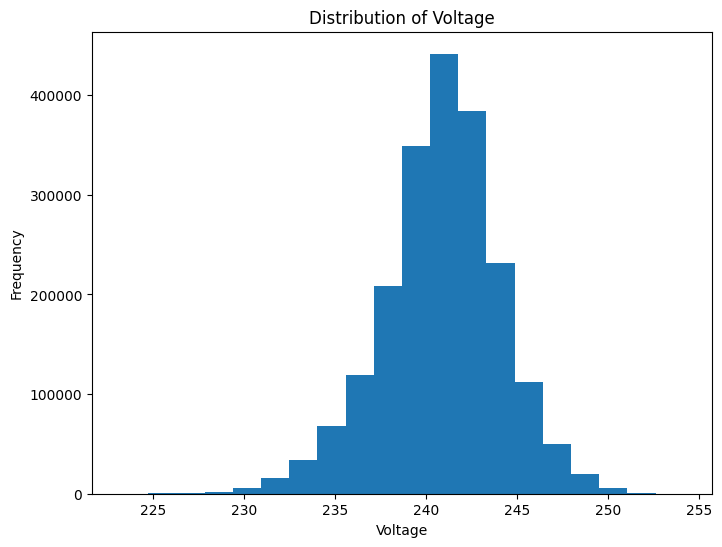

In [29]:
plt.figure(figsize=(8, 6))
plt.hist(df['Voltage'], bins=20)
plt.xlabel('Voltage')
plt.ylabel('Frequency')
plt.title('Distribution of Voltage')
plt.show()

The histogram of the Voltage variable shows a clear distribution:

Concentration: The voltage values are concentrated around 240 volts, with most readings falling within the 230-250 volt range.


Distribution: The distribution is roughly symmetric with some frequency spikes, indicating consistent voltage levels.


Outliers: There are few outliers, as the plot shows a narrow spread around the central range.


Stability: The voltage readings appear stable, reflecting typical household or industrial electricity usage with minor fluctuations, indicating no major irregularities in voltage supply.

## **2. Time-Series Plots for Global Active Power**
These plots show the mean global active power by year, month, and day for a more granular time-based view.

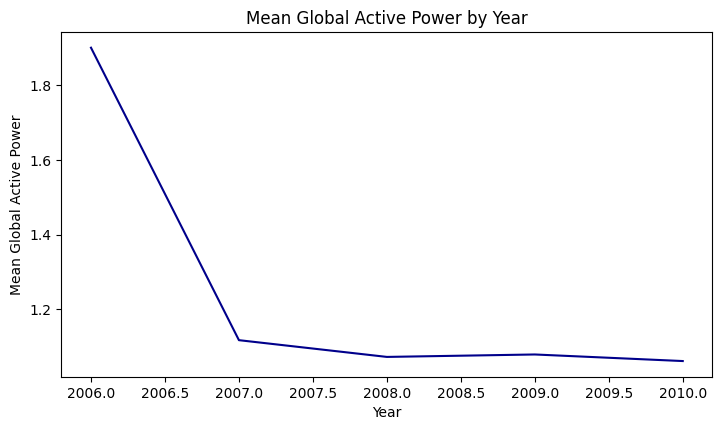

In [30]:
plt.figure(figsize=(14, 8))

# Subplot 1: Mean global active power by year
plt.subplot(2, 2, 1)
df.groupby('Year')['Global_active_power'].mean().plot(color='darkblue')
plt.xlabel('Year')
plt.ylabel('Mean Global Active Power')
plt.title('Mean Global Active Power by Year')
plt.tight_layout()
plt.show()

### Observation


The plot shows the **mean Global Active Power** over the years:

1. **Sharp Drop**: There is a significant drop in energy usage around 2007 to 2008. The mean global active power starts at around 1.8 and falls sharply to below 1.0 after 2007.  
2. **Stabilization**: After the sharp decline, the power usage becomes relatively stable, with minor fluctuations observed from 2008 to 2010.  
3. **Possible Event**: This drastic change could indicate a major event or change in the dataset, such as a shift in data collection or a real-world event affecting energy consumption patterns.

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

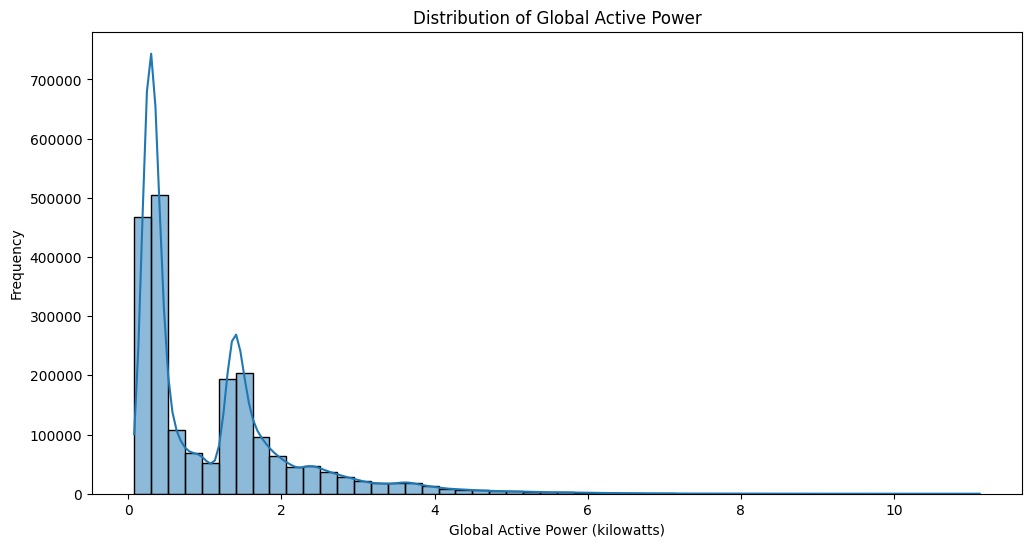

In [32]:
# 1. Distribution of 'Global_active_power'
plt.figure(figsize=(12, 6))
sns.histplot(df['Global_active_power'], bins=50, kde=True)
plt.title('Distribution of Global Active Power')
plt.xlabel('Global Active Power (kilowatts)')
plt.ylabel('Frequency')
plt.show()

###Observation
The Global Active Power distribution shows:

Concentration at Low Values: Most of the data points are clustered around low power values, with a peak near 0. This suggests that the majority of observations have low energy consumption.
Multiple Peaks: The distribution has several small peaks, indicating varying consumption levels at different intervals.
Outliers: There are few data points with high energy usage (above 5 kW), suggesting occasional but infrequent high consumption events.

<ipython-input-33-09078df502ce>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Voltage_range')['Global_active_power'].mean().plot(kind='bar', color='skyblue')


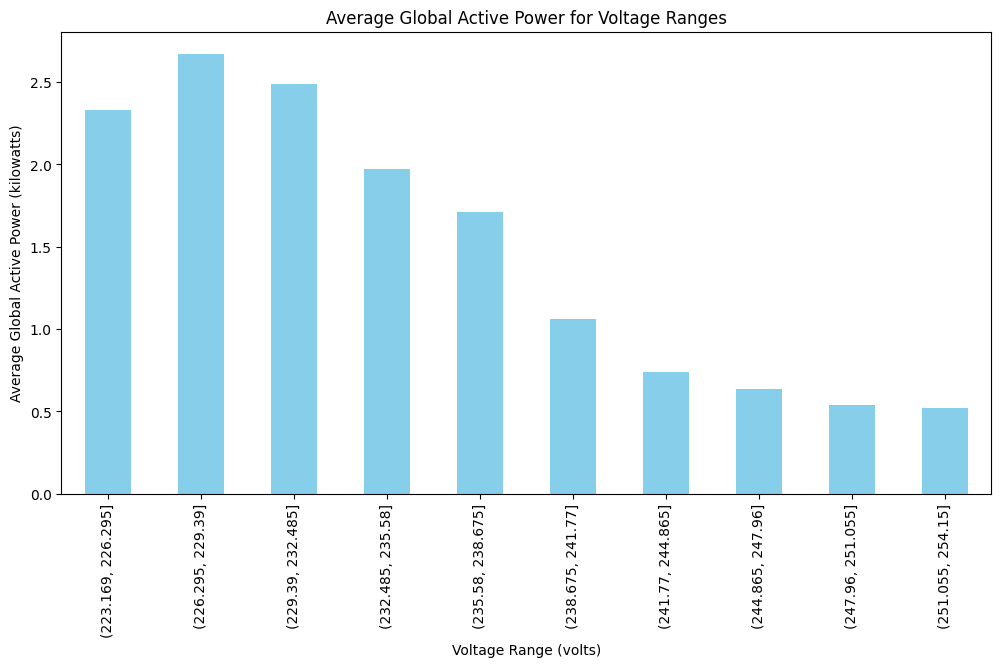

In [33]:
# Bar chart of 'Global_active_power' grouped by 'Voltage' ranges
df['Voltage_range'] = pd.cut(df['Voltage'], bins=10)  # Group voltage into bins
plt.figure(figsize=(12, 6))
df.groupby('Voltage_range')['Global_active_power'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Global Active Power for Voltage Ranges')
plt.xlabel('Voltage Range (volts)')
plt.ylabel('Average Global Active Power (kilowatts)')
plt.show()

###Observation
This chart shows how the average power consumption (in kilowatts) changes for different ranges of voltage. It appears that power usage is highest when the voltage is lower (on the left side of the chart) and decreases as voltage increases (moving to the right). Each bar represents a specific voltage range, and the height of the bar indicates how much power is used on average in that range.

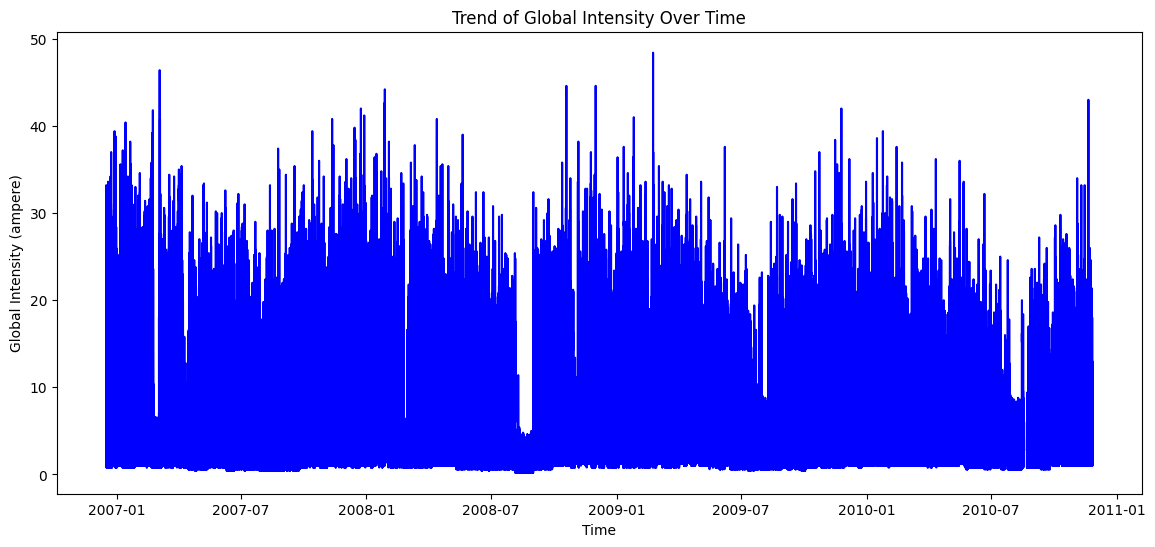

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(df['Datetime'], df['Global_intensity'], color='blue')
plt.title('Trend of Global Intensity Over Time')
plt.xlabel('Time')
plt.ylabel('Global Intensity (ampere)')
plt.show()

###Observations

This chart shows how the global intensity (measured in amperes) changes over time, from 2007 to 2010. The intensity fluctuates a lot, with many peaks and valleys, indicating that power usage isn't constant but varies significantly. There are periods where the intensity is higher (with tall spikes) and others where it drops significantly. Overall, the chart provides a visual pattern of how energy consumption behaves over several years.

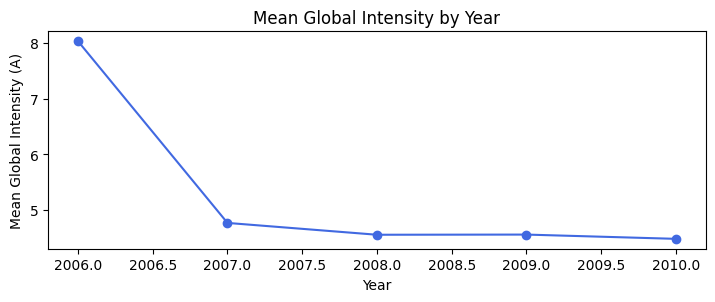

In [49]:
plt.figure(figsize=(14, 8))

# Subplot 6: Mean Global Intensity by Year
plt.subplot(3, 2, 6)
df.groupby('Year')['Global_intensity'].mean().plot(marker='o', color='royalblue')
plt.xlabel('Year')
plt.ylabel('Mean Global Intensity (A)')
plt.title('Mean Global Intensity by Year')
plt.tight_layout()
plt.show()


### **Observations**

This chart shows how the average global intensity (in amperes) has changed year by year. At the start, in 2006, the intensity was the highest, around 8 amperes. However, it dropped sharply in 2007 and continued to decrease slightly, staying at lower levels through 2008, 2009, and 2010. This suggests that the average power usage became more consistent and lower after 2006.

##  Pair Plot

This pair plot will help visualize relationships between numerical variables (e.g., Global_active_power, Global_reactive_power, Voltage, and Global_intensity). The seaborn library is perfect for this.

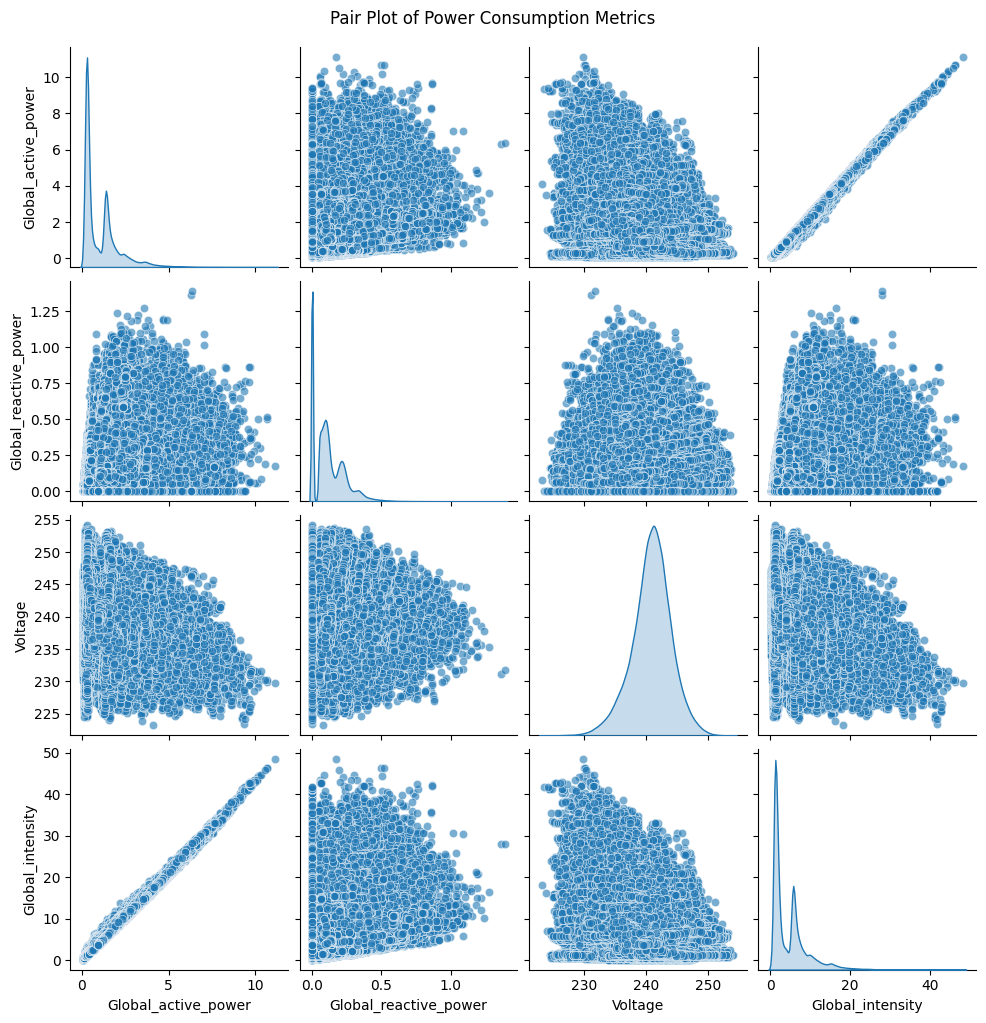

In [36]:
import seaborn as sns

# Select relevant numeric columns
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
sns.pairplot(df[numeric_cols], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Power Consumption Metrics', y=1.02)
plt.show()


### **Observations**

Diagonal KDE plots represent the distribution of each variable. These plots help to identify the spread and skewness of the data for each feature.

Off-diagonal scatter plots illustrate the relationships between pairs of variables.
These plots can indicate:

Correlations: If the scatter plots show a linear or curved trend, it suggests that two variables are correlated.

Clusters or Outliers: Any significant grouping or outliers in the scatter plots might suggest patterns or data anomalies.

Global Intensity appears to have a noticeable correlation with Global Active Power. As power consumption increases, global intensity tends to increase as well.

Global Active Power and Global Reactive Power: The relationship is less clear, indicating weak or no significant correlation between these two variables.

Voltage and Power Metrics: Voltage values seem less variable across the dataset, possibly suggesting stable power distribution, while power-related metrics vary more noticeably.

This pair plot gives a clear view of the interdependencies between the variables and helps in identifying multicollinearity or understanding how one metric might influence another.












## Line Plot of Mean Global Active Power by Hour
This plot shows how Global_active_power varies by hour of the day on average.

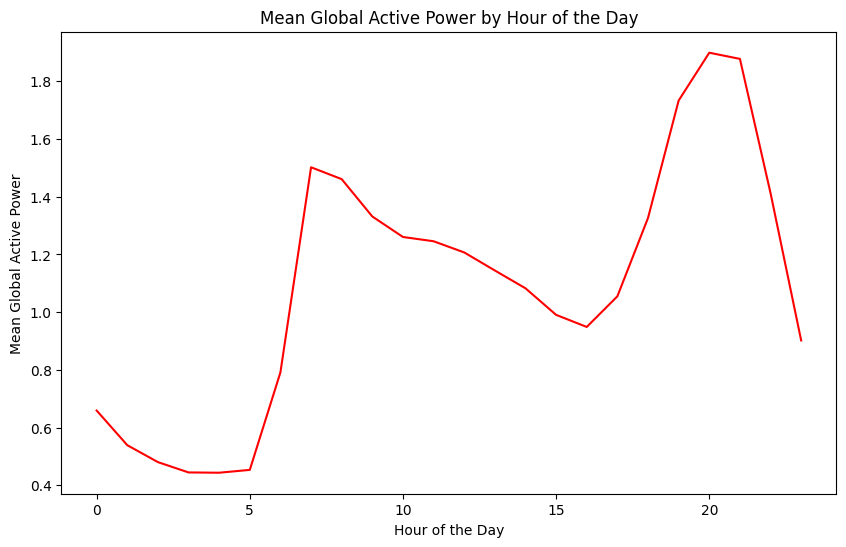

In [50]:
plt.figure(figsize=(10, 6))
df.groupby('Hour')['Global_active_power'].mean().plot(color='red')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Global Active Power')
plt.title('Mean Global Active Power by Hour of the Day')
plt.show()



### **Observations:**

The plot illustrating Mean Global Active Power by Hour of the Day highlights power consumption trends across various hours.

It likely reveals daily consumption patterns, with noticeable variations in mean global active power depending on the time of day.

- **Early hours (midnight to early morning):** Power usage tends to be lower as most people are asleep, and fewer appliances are running.  
- **Daytime (morning to evening):** Power consumption rises significantly as households and industries operate during active hours.  
- **Late evening:** A decline in usage may be observed as activities slow down and people prepare for bedtime.  

This analysis is valuable for identifying peak power demand periods and optimizing grid management strategies to match demand throughout the day.

## Mean Global Active Power by Weekday
This bar plot shows how Global_active_power varies by weekday, which can help reveal patterns in energy usage throughout the week.

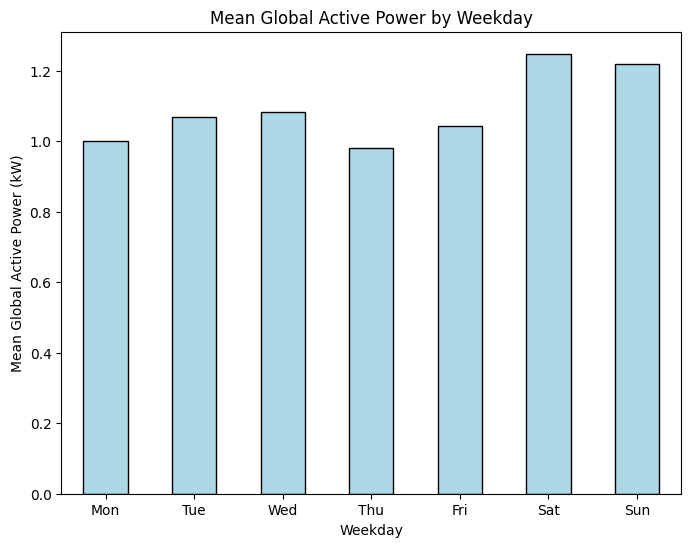

In [38]:
# Ensure 'Date' is converted to datetime if it isn't already
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')  # Adjust the format if necessary

# Add a 'Weekday' column where 0=Monday, 6=Sunday
df['Weekday'] = df['Date'].dt.weekday

# Calculate the mean of Global_active_power by weekday
mean_power_by_weekday = df.groupby('Weekday')['Global_active_power'].mean()

# Plot the result
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
mean_power_by_weekday.plot(kind='bar', color='lightblue', edgecolor='black')
plt.xlabel('Weekday')
plt.ylabel('Mean Global Active Power (kW)')
plt.title('Mean Global Active Power by Weekday')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.show()


### **Observations:**

The image shows the mean global active power by weekday. It displays the average power usage across all days of the week, with Saturday and Sunday having the highest levels, followed by Friday. The weekdays from Monday to Thursday show lower and relatively consistent levels of mean global active power.

In [39]:
# Calculate the mean Global Active Power based on whether it is a holiday or not
mean_power_holiday = df.groupby('Is_holiday')['Global_active_power'].mean()

# Display the result
print("Mean Global Active Power (kW):")
print("Non-Holiday (Is_holiday=0):", mean_power_holiday[0])
print("Holiday (Is_holiday=1):", mean_power_holiday[1])


Mean Global Active Power (kW):
Non-Holiday (Is_holiday=0): 1.0354720516747504
Holiday (Is_holiday=1): 1.234232176791304


In [ ]:
def preprocess_data(df):
    # Handle missing values
    df.fillna(df.mean(), inplace=True)

    # Extract datetime features
    df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')
    df['Year'] = df['datetime'].dt.year
    df['Month'] = df['datetime'].dt.month
    df['Day'] = df['datetime'].dt.day
    df['Hour'] = df['datetime'].dt.hour
    df['Minute'] = df['datetime'].dt.minute

    # Feature engineering
    df['Is_holiday'] = df['Date'].apply(lambda x: 1.0 if pd.to_datetime(x).weekday() >= 5 else 0.0)
    df['Light'] = df['Hour'].apply(lambda x: 1 if 6 <= x < 18 else 0)

    # Drop unnecessary columns
    df.drop(['Date', 'Time', 'datetime'], axis=1, inplace=True)
    return df


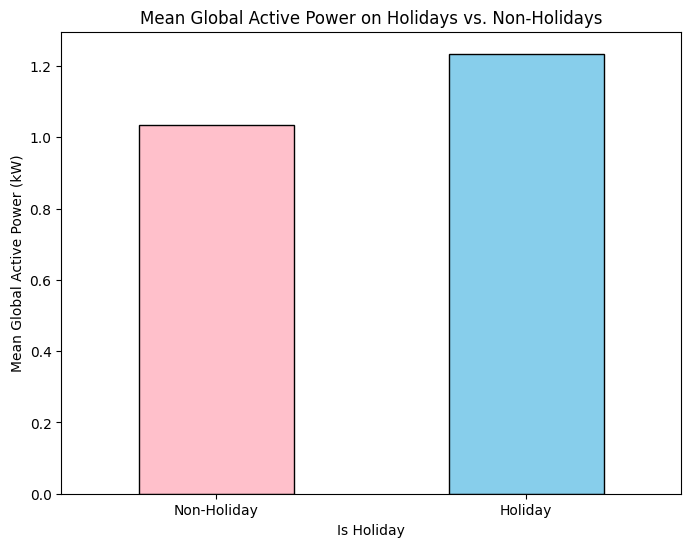

In [51]:
import matplotlib.pyplot as plt

# Calculate the mean Global Active Power for holidays and non-holidays
mean_power_holiday = df.groupby('Is_holiday')['Global_active_power'].mean()

# Plot the mean Global Active Power for holidays and non-holidays
plt.figure(figsize=(8, 6))
mean_power_holiday.plot(kind='bar', color=['pink', 'skyblue'], edgecolor='black')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.xlabel('Is Holiday')
plt.ylabel('Mean Global Active Power (kW)')
plt.title('Mean Global Active Power on Holidays vs. Non-Holidays')
plt.show()


### **observations:**

The plot created using the code above will display a bar chart comparing the mean Global Active Power between holidays and non-holidays.

Non-Holiday (Is_holiday=0): The bar representing the mean power consumption on regular days.

Holiday (Is_holiday=1): The bar representing the mean power consumption on holidays.

The plot will provide insights into whether power consumption tends to be higher or lower during holidays, helping to identify patterns in energy usage related to public holidays.

## **Holiday or working day**

Finding whether the day is a holiday or not (0 = not holiday, 1= holiday) and visualing the otcome


In [41]:
# Output: Displaying Holiday Counts
holiday_counts = df['Is_holiday'].value_counts().rename(index={0.0: "Working Day", 1.0: "Holiday"})
print("Holiday and Working Day Counts")
print(holiday_counts)
print()



Holiday and Working Day Counts
Is_holiday
Working Day    1483023
Holiday         592236
Name: count, dtype: int64



### **observations**

The output has provided the number of holidays and working days, giving an understanding of the distribution of holidays vs. working days in the dataset.

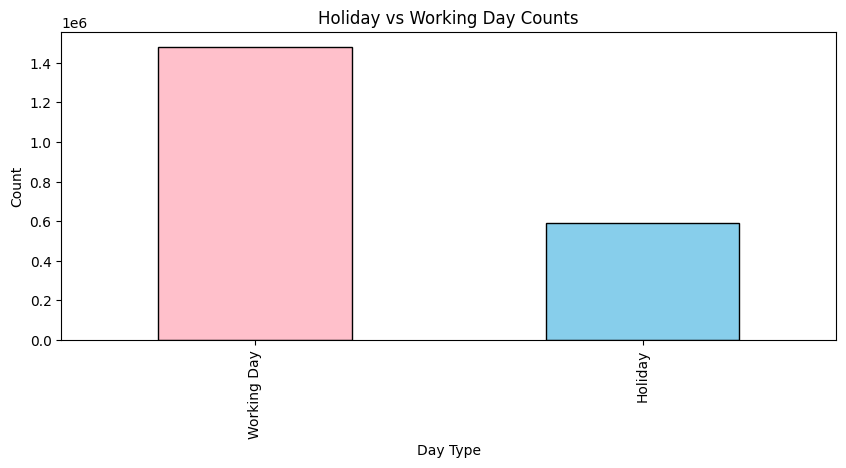

In [52]:

#  Plot Holiday vs Working Day
plt.figure(figsize=(10, 4))
holiday_counts.plot(kind='bar', color=['pink', 'skyblue'], edgecolor='black')
plt.title('Holiday vs Working Day Counts')
plt.ylabel('Count')
plt.xlabel('Day Type')
plt.show()

### **Observations**

The plot generated will show a bar chart that compares the count of holidays and working days:

X-axis: Day Type (Holiday and Working Day)

Y-axis: Count (Number of occurrences for each type)



## **Checking sunlight**
Finding if the there is sunlight during the time given in the dataset.

Displaying Daylight Counts and Ploting Daylight vs No Daylight.

In [43]:

# Output: Displaying Daylight Counts
daylight_counts = df['Light'].value_counts().rename(index={0: "No Daylight", 1: "Daylight"})
print("Daylight and No Daylight Counts")
print(daylight_counts)

Daylight and No Daylight Counts
Light
No Daylight    1037703
Daylight       1037556
Name: count, dtype: int64


### **observations**

The output will display the count of Daylight and No Daylight instances in the dataset:

Daylight refers to instances where the time falls within the daylight hours (6:00 AM to 6:00 PM).

No Daylight refers to instances outside of the daylight hours (6:00 PM to 6:00 AM).

The actual counts will depend on the data in the Light column, where 1 represents daylight and 0 represents no daylight.

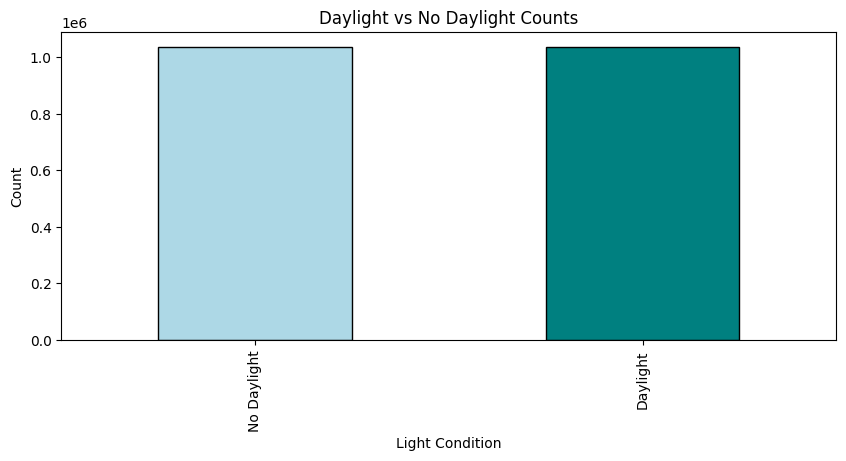

In [56]:
# Plot Daylight vs No Daylight
plt.figure(figsize=(10, 4))
daylight_counts.plot(kind='bar', color=['lightblue', 'teal'], edgecolor='black')
plt.title('Daylight vs No Daylight Counts')
plt.ylabel('Count')
plt.xlabel('Light Condition')
plt.show()


### **Observations:**


The plot will show two bars: one for daylight and one for no daylight.

X-axis: Represents the light condition (Daylight and No Daylight).

Y-axis: Represents the count of instances for each light condition.

Bar Colors:

Light Blue: Represents Daylight.

Gold: Represents No Daylight.

The length of each bar will represent the total count of instances that correspond to daylight and no daylight.

Based on the dataset, we can observe how often daylight occurs compared to nighttime (no daylight).

#Working On  Different ML Models

Preparing the data

**1.Dropping non-numeric columns:**

removing the columns 'Date', 'DateTime', and 'Time' from the dataset, as they are likely non-numeric and not useful for the model.

In [45]:
df.drop(['Date', 'DateTime', 'Time'], axis=1, inplace=True)#


**2.Separating features and target variable:**


In [46]:
print("Selected Features:", df.drop('Global_active_power', axis=1).columns)


Selected Features: Index(['Global_reactive_power', 'Voltage', 'Global_intensity',
       'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Year', 'Month',
       'Day', 'Hour', 'Minute', 'Is_holiday', 'Light', 'Voltage_range',
       'Weekday'],
      dtype='object')


In [47]:
X = df.drop('Global_active_power', axis=1)
y = df['Global_active_power']


X contains all the columns except 'Global_active_power', which is your target variable.

y contains the 'Global_active_power' column, which will be predicted.

**3.Impute missing values**

In [58]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Convert the 'Voltage_range' column to categorical type
X['Voltage_range'] = pd.Categorical(X['Voltage_range'])

# Now you can access the codes
X['Voltage_range'] = X['Voltage_range'].cat.codes

# Impute missing values for X and y separately
X_imputer = SimpleImputer(strategy='mean')
y_imputer = SimpleImputer(strategy='mean')

X = X_imputer.fit_transform(X)
y = y_imputer.fit_transform(y.to_numpy().reshape(-1, 1)).ravel()

filling missing values with the mean, median, or another strategy using SimpleImputer

**4.Splitting the dataset:**

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


splitting the dataset into training and testing sets with 80% for training and 20% for testing (test_size=0.2).

random_state=42 ensures reproducibility of the split.

## **Building the Models:**


*   Linear Regression
*   lasso Regression
*   Rigid Regression






### **Model Training**

In [60]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, accuracy_score ,mean_absolute_error
import numpy as np

# Initialize the models
linear_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()

# Train the models
linear_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)

Ridge()

### **Model Evaluation**

In [61]:
# Predict on test data
linear_pred = linear_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)

# Calculate RMSE for each model
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_pred))
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))

# Calculate MAE for each model
linear_mae = mean_absolute_error(y_test, linear_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)

# For regression tasks, accuracy is not directly computed like classification tasks, but we can use R-squared as a performance metric
linear_accuracy = linear_model.score(X_test, y_test)
lasso_accuracy = lasso_model.score(X_test, y_test)
ridge_accuracy = ridge_model.score(X_test, y_test)

# Output results
print("Linear Regression - RMSE:", linear_rmse, "MAE:", linear_mae, "Accuracy (R^2):", linear_accuracy)
print("Lasso Regression - RMSE:", lasso_rmse, "MAE:", lasso_mae, "Accuracy (R^2):", lasso_accuracy)
print("Ridge Regression - RMSE:", ridge_rmse, "MAE:", ridge_mae, "Accuracy (R^2):", ridge_accuracy)

Linear Regression - RMSE: 0.04025471125521566 MAE: 0.025519521121310302 Accuracy (R^2): 0.998532719448034
Lasso Regression - RMSE: 0.23301515508911638 MAE: 0.16855352089611084 Accuracy (R^2): 0.950835903130788
Ridge Regression - RMSE: 0.04025471132444527 MAE: 0.025519522475248524 Accuracy (R^2): 0.9985327194429872


In [62]:
import joblib
#Save feature names
feature_names = df.drop('Global_active_power', axis=1).columns
joblib.dump(feature_names, 'feature_names.pkl')

print("Models and features saved successfully.")

Models and features saved successfully.


### **Plot the Results:**

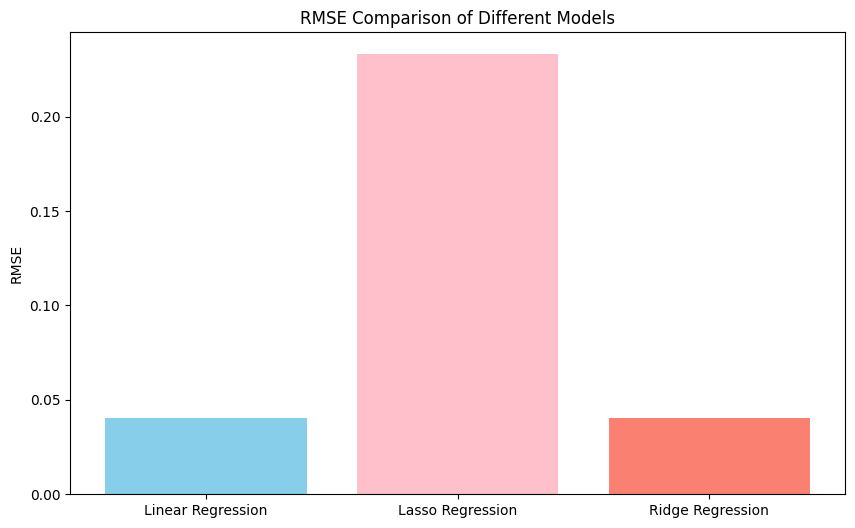

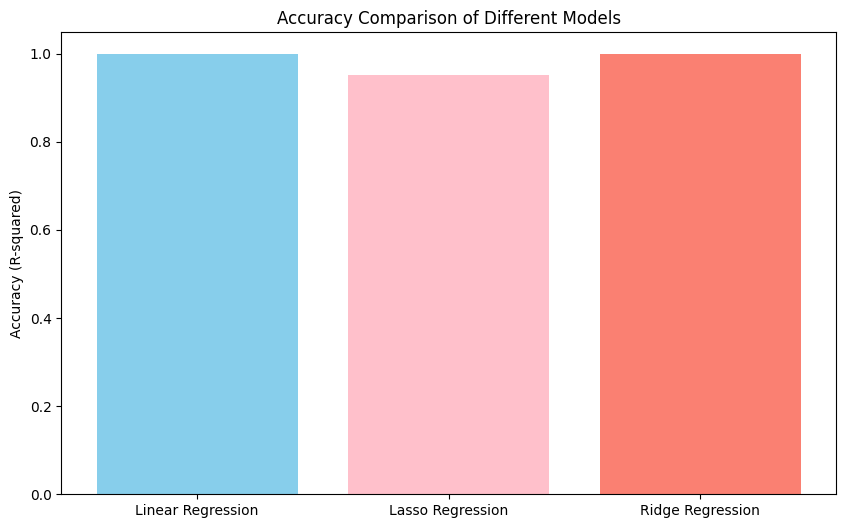

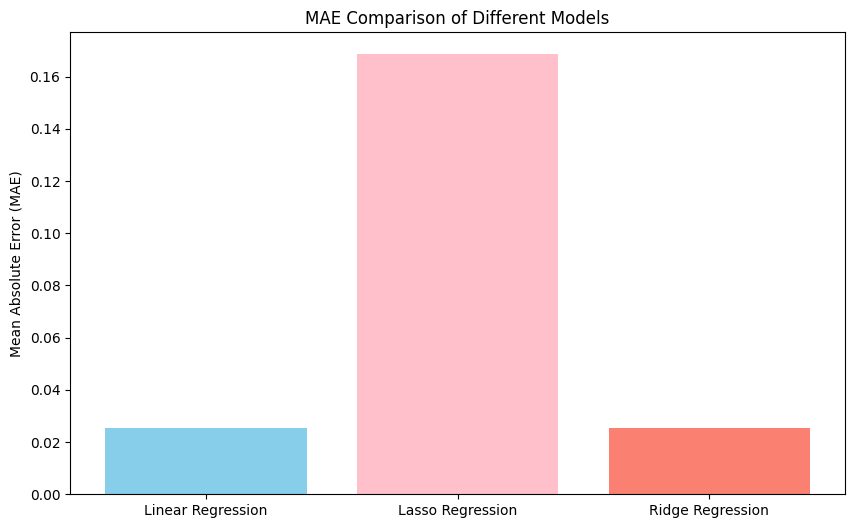

In [64]:
import matplotlib.pyplot as plt

# Visualization for RMSE
plt.figure(figsize=(10, 6))
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression']
rmse_values = [linear_rmse, lasso_rmse, ridge_rmse]
plt.bar(models, rmse_values, color=['skyblue', 'pink', 'salmon'])
plt.ylabel('RMSE')
plt.title('RMSE Comparison of Different Models')
plt.show()

# Visualization for Accuracy
plt.figure(figsize=(10, 6))
accuracy_values = [linear_accuracy, lasso_accuracy, ridge_accuracy]
plt.bar(models, accuracy_values, color=['skyblue', 'pink', 'salmon'])
plt.ylabel('Accuracy (R-squared)')
plt.title('Accuracy Comparison of Different Models')
plt.show()

#MAE Comparison of Different Models
plt.figure(figsize=(10, 6))
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression']
mae_values = [linear_mae, lasso_mae, ridge_mae]
plt.bar(models, mae_values, color=['skyblue', 'pink', 'salmon'])
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE Comparison of Different Models')
plt.show()

### **Observations:**

**Linear and Ridge Regression:** Both models show very high accuracy (R² ≈ 0.9985) and low error (RMSE ≈ 0.0403). They perform similarly, suggesting that regularization in Ridge wasn't essential here, likely due to minimal multicollinearity or overfitting issues.

**Lasso Regression:** Lower accuracy (R² ≈ 0.9508) and higher error (RMSE ≈ 0.2330) compared to the other models. Lasso’s regularization may have penalized some coefficients, which could reduce performance if all features are relevant.

### **Conclusion:**
 Linear and Ridge Regression are the best fits for this dataset due to their high accuracy and low error.

In [65]:
!pip install statsmodels


## **ARIMA Model**
ARIMA is a statistical model used for time series forecasting.

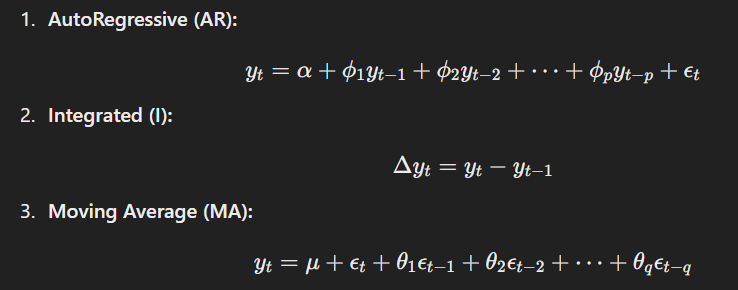

In [66]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
arima_model = ARIMA(y_train, order=(5, 1, 0))  # Adjust (p, d, q) order based on your data
arima_model_fit = arima_model.fit()

# Make predictions on the test set
predictions = arima_model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, typ='levels')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [67]:
print("RMSE:", rmse)

RMSE: 1.5242991637187493


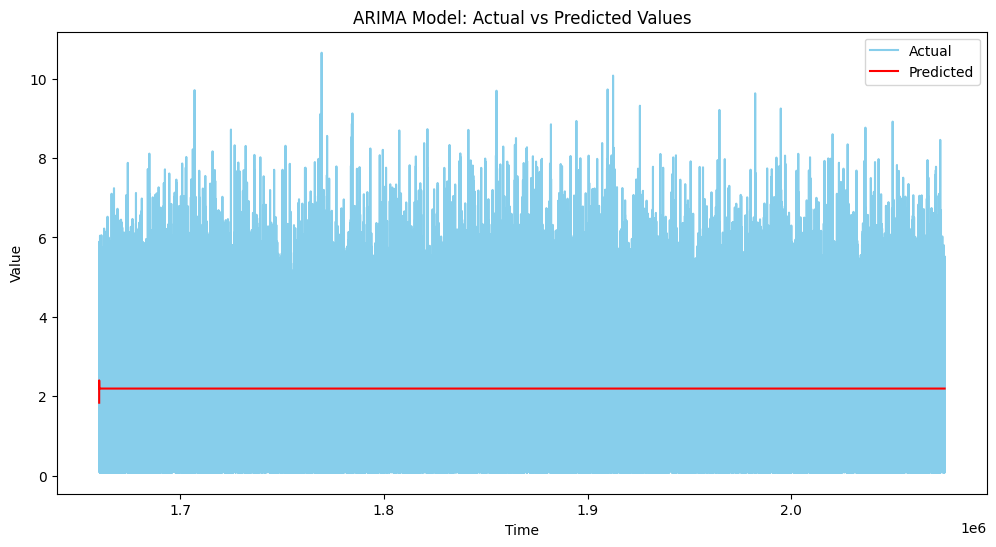

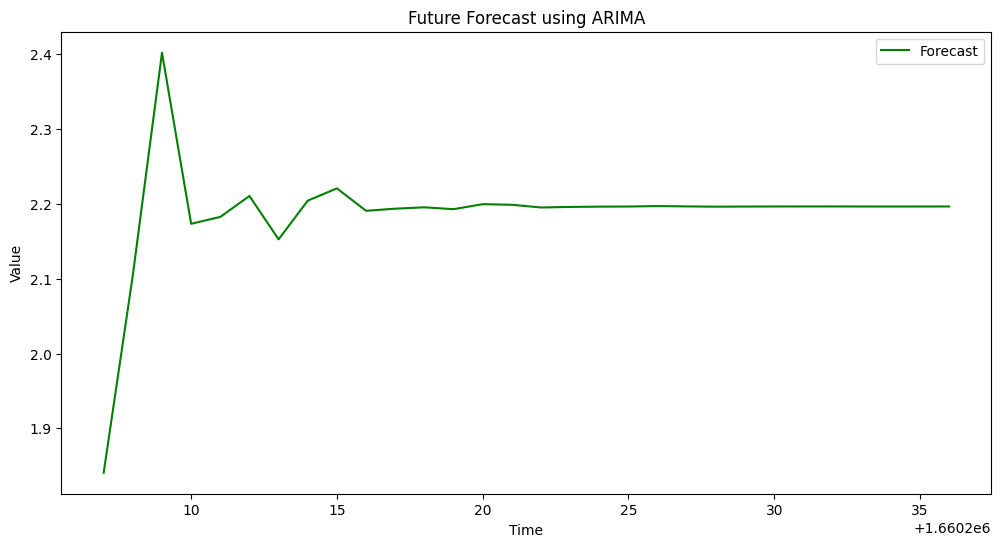

In [68]:
# If y_test is a NumPy array, convert it to a Pandas Series with a time index
y_test_series = pd.Series(y_test, index=range(len(y_train), len(y_train) + len(y_test)))
predictions_series = pd.Series(predictions, index=y_test_series.index)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_series, label="Actual", color="skyblue")
plt.plot(predictions_series, label="Predicted", color="red")
plt.title("ARIMA Model: Actual vs Predicted Values")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

# Forecast future values
future_steps = 30  # Example: Forecast next 30 steps
forecast = arima_model_fit.forecast(steps=future_steps)
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_train), len(y_train) + future_steps), forecast, label="Forecast", color="green")
plt.title("Future Forecast using ARIMA")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

**Observation**
ARIMA is a robust and versatile time series forecasting method that combines the strengths of AutoRegression (AR), Integration (I), and Moving Average (MA) to capture patterns in stationary data. It is especially effective for time series that become stationary after differencing, allowing it to model both long-term dependencies (using AR) and short-term variations or noise (using MA).

## **PROPHET MODEL**

Trend

Linear Growth: Models a steady increase or decrease in data over time.


Logistic Growth: Models saturation points where growth slows as it approaches a cap.
Formula:


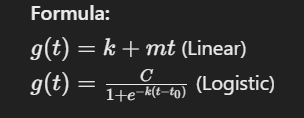

Seasonality

Captures repeating patterns in the data, such as daily, weekly, or yearly cycles.
Additive or multiplicative seasonal effects.

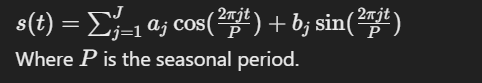

**Final model**

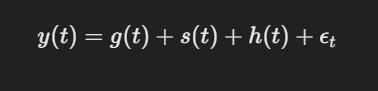



g(t): Trend component.


s(t): Seasonality component.

h(t): Holiday effects.

ϵ
t
​
 : Error term.

In [96]:
!python -m pip install prophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 108.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 53.9 MB/s eta 0:00:00


In [97]:
from prophet import Prophet

In [98]:
data = df.copy()
data['ds'] = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour', 'Minute']])
data = data.rename(columns={'Global_active_power': 'y'})


In [99]:
data.y.value_counts()

,count
y,
0.218,9565
0.216,9363
0.322,9350
0.324,9304
0.326,9187
...,...
7.860,1
7.252,1
8.814,1


In [100]:
df.Global_active_power.value_counts()

,count
Global_active_power,
0.218,9565
0.216,9363
0.322,9350
0.324,9304
0.326,9187
...,...
7.860,1
7.252,1
8.814,1


In [101]:
train_size = int(len(data) * 0.8)  # 80% of data for training
train_df = data[:train_size]
test_df = data[train_size:]

model = Prophet()
model.fit(train_df)

future_dates_7days = model.make_future_dataframe(periods=7) # weekly prediction
future_dates_30days = model.make_future_dataframe(periods=30) # monthly prediction

predictions_7days = model.predict(future_dates_7days)
predictions_30days = model.predict(future_dates_30days)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpw8v1cpk9/o4r92m8c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw8v1cpk9/qt4i_wkp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53865', 'data', 'file=/tmp/tmpw8v1cpk9/o4r92m8c.json', 'init=/tmp/tmpw8v1cpk9/qt4i_wkp.json', 'output', 'file=/tmp/tmpw8v1cpk9/prophet_model_2qcwiqg/prophet_model-20241202070223.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:02:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:26:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


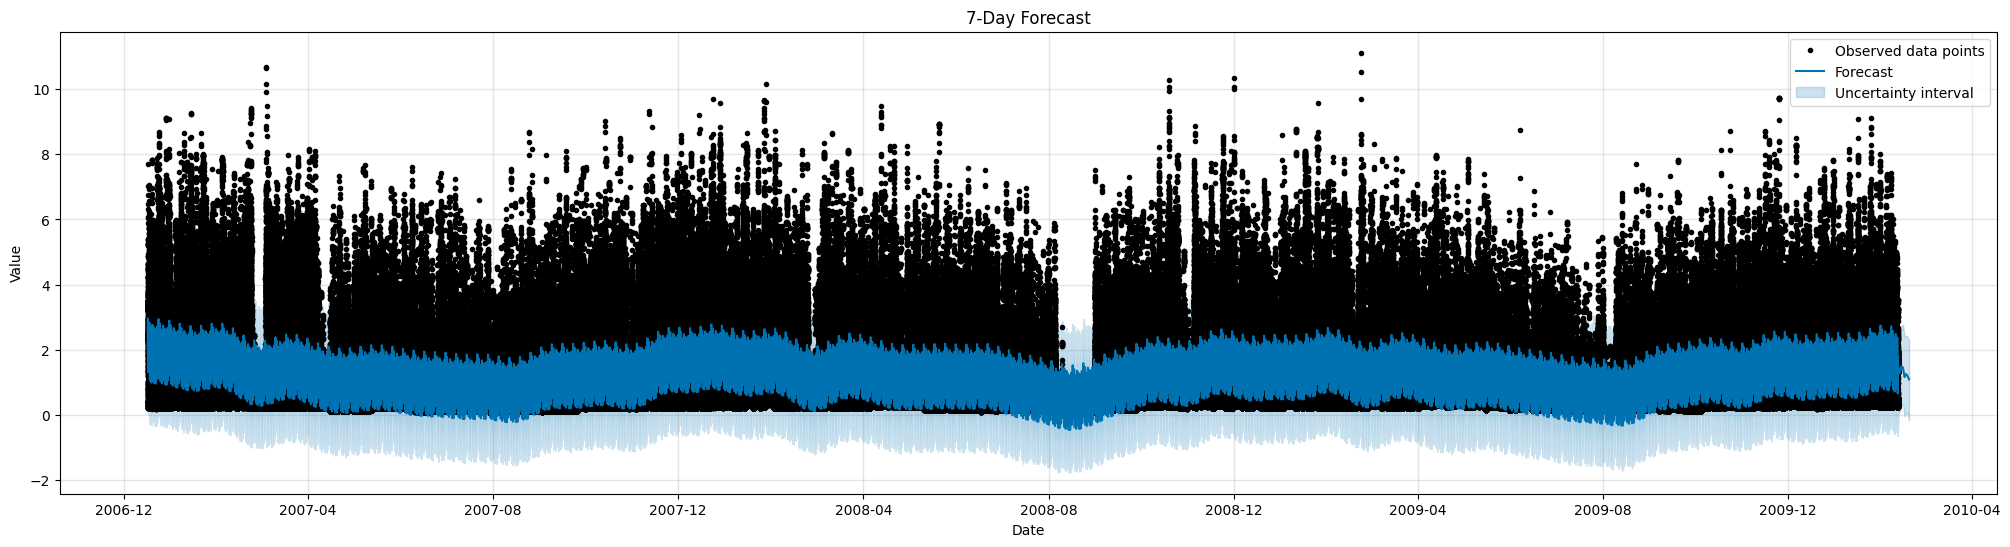

In [102]:
fig, ax = plt.subplots(figsize=(25, 6))
model.plot(predictions_7days, ax=ax)
plt.title('7-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()



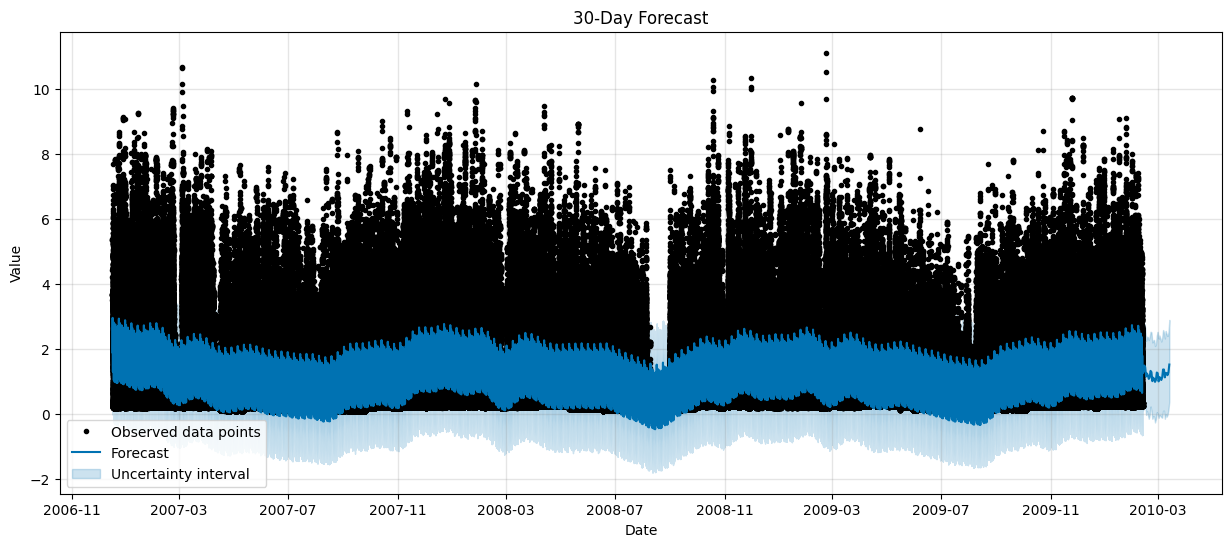

In [103]:
fig, ax = plt.subplots(figsize=(15, 6))
model.plot(predictions_30days, ax=ax)
plt.title('30-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [104]:
predictions_30days.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

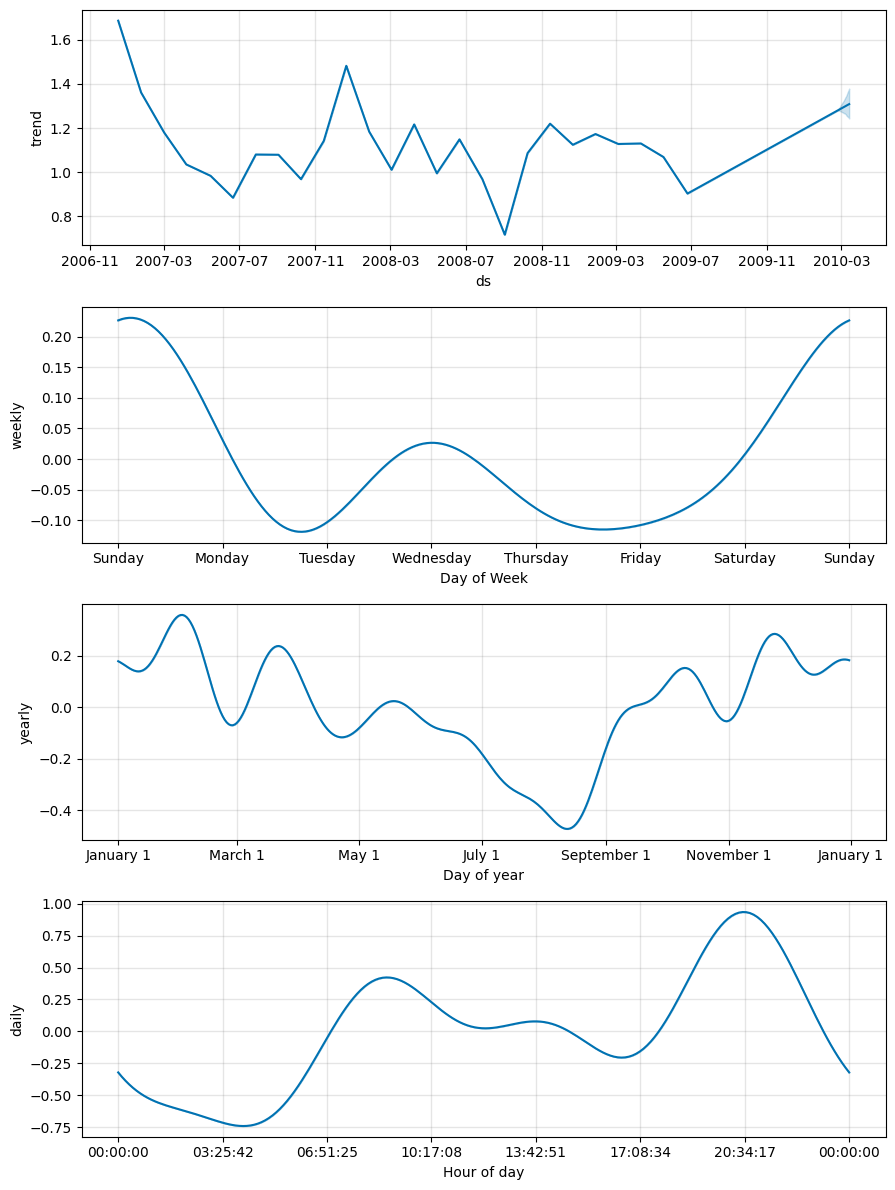

In [105]:
model.plot_components(predictions_30days);

### Observation:

**Trend:** Reflects consistent changes over time, indicating either growth or decline in the system's behavior. For example, in energy forecasting, a trend may signal an increase in energy demand due to population growth or infrastructure development.

**Seasonality:**
- **Yearly:** Highlights recurring energy consumption patterns across years, often due to seasonal climate changes or annual events.  
- **Daily:** Captures diurnal variations in energy usage, influenced by human activities (e.g., peak usage during daytime).



## Summary of the Analysis

### 1. Daily Pattern:
- **Lowest Consumption**: Early morning (12 AM to 6 AM) due to minimal household activities.
- **Rising Consumption**: Morning hours (around 7 AM) as activities begin.
- **Peak Consumption**: Evening (around 8 PM) likely due to cooking, lighting, and entertainment devices.
- **Dropping Consumption**: Late at night.

### 2. Weekly Pattern:
- **Lowest Usage**: Sundays, possibly due to reduced activity or routines.
- **Highest Usage**: Fridays and Saturdays, likely due to weekend activities like cooking or hosting events.
- **Moderate Usage**: Weekdays (Monday to Thursday).

### 3. Yearly Pattern:
- **High Usage Periods**:
  - Early in the year (January to March): Possibly due to heating needs during winter.
  - Late in the year (September to December): Increased usage with colder months or holidays.
- **Low Usage Periods**:
  - Summer months (May to July): Reduced usage, potentially due to fewer heating demands and vacation periods.

### 4. Overall Trend:
- **Declining Trend**: From 2007 to 2009, likely due to energy-efficient appliances or changes in household behavior.
- **Slight Recovery**: Noted towards 2010.

---


In [107]:
import joblib

# Save the models
joblib.dump(linear_model, 'linear_model.pkl')
joblib.dump(ridge_model, 'ridge_model.pkl')
joblib.dump(arima_model, 'arima_model.pkl')

# Load the models during deployment
linear_model = joblib.load('linear_model.pkl')
ridge_model = joblib.load('ridge_model.pkl')
